In [1]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import numpy as np

### Loading data

In [2]:
meteo = pd.read_excel("meteo_2017_2022.xlsx")
itk_SD = pd.read_excel("ITK_TrajectOire.xlsx", sheet_name="SD")
itk_PN = pd.read_excel("ITK_TrajectOire.xlsx", sheet_name="PN")
itk_ref = pd.read_excel("ITK_TrajectOire.xlsx", sheet_name="Ref")
itk_BI = pd.read_excel("ITK_TrajectOire.xlsx", sheet_name="BasInt")
itk_Bio = pd.read_excel("ITK_TrajectOire.xlsx", sheet_name="Bio")
itk_Elev = pd.read_excel("ITK_TrajectOire.xlsx", sheet_name="Elev")
ntraj = pd.read_excel("Data_NTraj.xlsx")

In [3]:
meteo.head()

,Date,Mois,Année,Temp moyenne (°C),Pluie (mm),Temp min,Temp max,ETP Penman (mm),Humidité moyenne (%),Humidité max (%),Humidité min (%)
0,2017-09-15,9,2017,11.2,0.0,7.6,16.5,2.3,84.0,99.0,56.0
1,2017-09-16,9,2017,10.7,1.0,4.8,15.6,1.6,86.0,100.0,57.0
2,2017-09-17,9,2017,11.3,3.0,9.4,15.7,1.5,89.0,100.0,66.0
3,2017-09-18,9,2017,10.5,9.0,4.4,17.1,1.6,91.0,100.0,70.0
4,2017-09-19,9,2017,11.7,2.0,9.2,16.8,1.7,88.0,99.0,60.0


In [4]:
itk_SD.head()

,Culture princ.,Année,Date,Semaine,Peuplement,Type d'opération,Type_1,Info complémentaire 1,Quantité_1,Unité_1,...,Unité_3,% concerné_3,Type_4,Quantité_4,Unité_4,% concerné_4,Type_5,Quantité_5,Unité_5,% concerné_5
0,Blé,2017-2018,2017-10-05 00:00:00,40.0,Sol nu,OC_Semis,Semoir Semeato,Semé par Christian,1,ha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Blé,2017-2018,2017-10-05 00:00:00,40.0,Sol nu,Ajout_semence,Traité,Boregar,220,gr./m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Blé,2017-2018,2017-10-05 00:00:00,40.0,Sol nu,Ajout_phyto,Traitement de semence,Gaucho,NaN,Dose hom.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Blé,2017-2018,2017-10-08 00:00:00,40.0,Sol nu,OC_Travail,Roulage 9m – tract 130 ch,NaN,1,ha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Blé,2017-2018,2017-10-31 00:00:00,44.0,Blé,OC_Autre,Traitement phyto - Pulve 3400 litres,NaN,1,ha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ntraj.head()

,Bande,Date,%H - h1,%H - h2,NO3 Sol - h1\nkgN.ha-1,NO3 Sol - h2\nkgN.ha-1,NH4 Sol - h1\nkgN.ha-1,NH4 Sol - h2\nkgN.ha-1,N2O gN.ha-1.j-1,Fertilisation (kgN.ha-1),N biomasse aérienne\n (KgN.ha-1),INN ou N Tester,INN ou N Tester ZéroN,PRS N-NO3\n(µg.10cm-2.14j-1),PRS N-NH4\n(µg.10cm-2.14j-1),PRS N-NO3 ZéroN\n(µg.10cm-2.14j-1),PRS N-NH4 ZéroN\n(µg.10cm-2.14j-1)
0,Elev8,2017-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACS,2018-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Toutes,2018-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Toutes,2018-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACS,2018-03-08,NaN,NaN,NaN,NaN,NaN,NaN,13.119371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(meteo.shape)
print(itk_SD.shape)
print(ntraj.shape)

(1749, 11)
(1036, 31)
(2871, 17)


### NLP

Un peu de traitement de langage pour enlever les accents, raccourcir les expressions et rendre le tout plus lisible. On applique ça sur tout ce qui contient des str (itk en particulier). Petit pb: l'encodage des accents en particulier pose pb avec les colonnes qui ont des NA, donc on l'applique à la fin, ce qui est dommage. Probablement un moyen de contourner/éviter ça

In [7]:
from unidecode import unidecode

In [8]:
def preprocess(df):
    str_col = df.select_dtypes(include=['string']).columns
    df[str_col] = df[str_col].replace(' ', '_', regex=True)
    df[str_col] = df[str_col].apply((lambda x: x.str.lower()), axis=1)
    for x in str_col:
        df[x] = df[x].apply(unidecode)
    return(df)

### ITK 

In [9]:
itk_SD.tail()

,Culture princ.,Année,Date,Semaine,Peuplement,Type d'opération,Type_1,Info complémentaire 1,Quantité_1,Unité_1,...,Unité_3,% concerné_3,Type_4,Quantité_4,Unité_4,% concerné_4,Type_5,Quantité_5,Unité_5,% concerné_5
1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Beaucoup de NA en fin de tableau car en remplissant ses excels Mr Python a mit des valeurs nulles/NA jusqu'à très loin, on va enlever les rangées pleines de NA

In [10]:
itk_SD.dropna(how="all", inplace=True)
itk_PN.dropna(how="all", inplace=True)
itk_BI.dropna(how="all", inplace=True)
itk_Bio.dropna(how="all", inplace=True)
itk_Elev.dropna(how="all", inplace=True)
itk_ref.dropna(how="all", inplace=True)

il reste des lignes remplies de NA sauf sur une colonne dans itk_SD, on les enlève à la main

In [11]:
itk_SD = itk_SD.iloc[:189]

In [12]:
print(itk_SD.Date.dtypes)
itk_SD["Date"] = itk_SD["Date"].astype("string")
print(itk_SD.shape)

object
(189, 31)


Il y a une date inconnue dans itk_SD notée xx, on la retire car elle pose problème (pas de type datetime)

In [13]:
itk_SD.drop(itk_SD.loc[itk_SD['Date']=="xx/07/18"].index, inplace=True)

In [14]:
print(itk_SD.shape)
print(itk_SD.Date.dtypes)
itk_SD["Date"] = itk_SD["Date"].astype("datetime64")
print(itk_SD.Date.dtypes)

(185, 31)
string
datetime64[ns]


In [15]:
print(itk_SD.shape)
print(itk_PN.shape)
print(itk_BI.shape)
print(itk_Bio.shape)
print(itk_Elev.shape)
print(itk_ref.shape)

(185, 31)
(167, 31)
(118, 31)
(53, 28)
(169, 31)
(162, 31)


J'ai checké ces tailles sur Excel et elles correspondent bien au nombre de lignes remplies.

In [16]:
# On indique le nom des bandes pour pouvoir savoir à quoi elles correspondent une fois qu'on va merge par dates

itk_SD["Bande"] = "acs"
itk_PN["Bande"] = "pn"
itk_BI["Bande"] = "bi"
itk_Bio["Bande"] = "bio"
itk_Elev["Bande"] = "elev"
itk_ref["Bande"] = "ref"

In [17]:
itk_concat = pd.concat([itk_SD, itk_PN, itk_BI, itk_Bio, itk_Elev, itk_ref], axis=0)

In [18]:
print(itk_SD.shape[0] + itk_PN.shape[0] + itk_BI.shape[0] + itk_Bio.shape[0] + itk_Elev.shape[0] + itk_ref.shape[0])
print(itk_concat.shape)

854
(854, 32)


In [19]:
itk_concat.columns

Index(['Culture princ.', 'Année', 'Date', 'Semaine', 'Peuplement',
       'Type d'opération', 'Type_1', 'Info complémentaire 1', 'Quantité_1',
       'Unité_1', '% concerné_1', 'Remarques générales', 'Matière active',
       'Dose MA/ha', 'Unité Ma/ha', 'Type_2', 'Quantité_2', 'Unité_2',
       '% concerné_2', 'Type_3', 'Quantité_3', 'Unité_3', '% concerné_3',
       'Type_4', 'Quantité_4', 'Unité_4', '% concerné_4', 'Type_5',
       'Quantité_5', 'Unité_5', '% concerné_5', 'Bande'],
      dtype='object')

In [20]:
itk_concat.reset_index(drop=True, inplace=True)

In [21]:
## On retire les colonnes vides/inutiles des itk
itk_concat.drop(itk_concat.columns[11:-1], axis=1, inplace=True)

In [22]:
## Changement du type object en type str pour en faciliter le traitement (regex, split)

itk_concat[itk_concat.select_dtypes("object").columns] = itk_concat[itk_concat.select_dtypes("object").columns].astype("string")

## checker les valeurs de semaine /!\

#### Ajout de la quantité d'apport azoté

Quantité devrait être un float, il faut le convertir. Seulement il y a des valeurs manquantes et il est compliqué de les remplacer. Egalement, comme toutes les quantités ne sont pas sur la même unité et ne correspondent pas au même produit, il faudrait pouvoir faire comprendre ça à l'algo ? --> on utilise les uN pour l'engrais, le reste on laisse tomber

In [23]:
itk_concat["Info complémentaire 1"]

0                         Semé par Christian
1                                    Boregar
2                                     Gaucho
3                                       <NA>
4                                       <NA>
                       ...                  
849    Aliseo Gold Safeneur (S-métolachlore)
850               Dakota P (Diméthénamide P)
851                Dakota P (Pendiméthaline)
852                                     <NA>
853                          Rendement à 9°H
Name: Info complémentaire 1, Length: 854, dtype: string

In [24]:
itk_concat["uN"] = np.nan

In [25]:
idx = itk_concat[~itk_concat["Info complémentaire 1"].isnull()][itk_concat[~itk_concat["Info complémentaire 1"].isnull()]["Info complémentaire 1"].str.contains("uN")].index

In [26]:
uNvalues = pd.Series([value[0].split(" ")[0] for value in itk_concat.loc[idx,:]["Info complémentaire 1"].str.split("_")])

In [27]:
uNvalues = uNvalues.apply(lambda x: str(x).replace('uN', ''))
uNvalues = uNvalues.apply(lambda x: str(x).replace(',', '.'))
uNvalues.unique()

array(['78', '76', '39', '31.2', '38', '72', '41', '99', '51', '94',
       '58.5', '57', '43', '56.55', '58', '34', '50', '37', '56', '90',
       'Orgaliz', '48', '40', '81', '29.25', '70', '119', '32', '92',
       '97'], dtype=object)

Valeur 'Orgaliz' qui met le bazar, on va regarder ce que c'est 

In [28]:
itk_concat[itk_concat["Info complémentaire 1"].str.contains('Orgaliz')]

,Culture princ.,Année,Date,Semaine,Peuplement,Type d'opération,Type_1,Info complémentaire 1,Quantité_1,Unité_1,% concerné_1,Bande,uN
483,Triticale,2018-2019,2019-02-25,9.0,Triticale,Ajout_engrais,Engrais organique,Orgaliz F 12-2-0 (88 uN),733.0,kg/ha,0.96,bio,NaN


On remplace cette valeur par 88

In [29]:
uNvalues[uNvalues=='Orgaliz'] = '88'

In [30]:
uNvalues.unique()

array(['78', '76', '39', '31.2', '38', '72', '41', '99', '51', '94',
       '58.5', '57', '43', '56.55', '58', '34', '50', '37', '56', '90',
       '88', '48', '40', '81', '29.25', '70', '119', '32', '92', '97'],
      dtype=object)

In [31]:
uNvalues = uNvalues.astype("float64")

In [32]:
for id_df, id_uN in zip(idx, uNvalues.index):
    itk_concat.at[id_df,"uN"] = uNvalues[id_uN]

In [33]:
itk_concat.head(10)

,Culture princ.,Année,Date,Semaine,Peuplement,Type d'opération,Type_1,Info complémentaire 1,Quantité_1,Unité_1,% concerné_1,Bande,uN
0,Blé,2017-2018,2017-10-05,40.0,Sol nu,OC_Semis,Semoir Semeato,Semé par Christian,1,ha,1.00,acs,NaN
1,Blé,2017-2018,2017-10-05,40.0,Sol nu,Ajout_semence,Traité,Boregar,220,gr./m2,1.00,acs,NaN
2,Blé,2017-2018,2017-10-05,40.0,Sol nu,Ajout_phyto,Traitement de semence,Gaucho,<NA>,Dose hom.,1.00,acs,NaN
3,Blé,2017-2018,2017-10-08,40.0,Sol nu,OC_Travail,Roulage 9m – tract 130 ch,<NA>,1,ha,1.00,acs,NaN
4,Blé,2017-2018,2017-10-31,44.0,Blé,OC_Autre,Traitement phyto - Pulve 3400 litres,<NA>,1,ha,1.00,acs,NaN
5,Blé,2017-2018,2017-10-31,44.0,Blé,Ajout_phyto,Herbicides,Varia (chlorotoluron 400 g/L),0.8888888888888888,Dose hom.,1.00,acs,NaN
6,Blé,2017-2018,2017-10-31,44.0,Blé,Ajout_phyto,Herbicides,Varia (Diflufénicanil 25 g/L ),0.8888888888888888,Dose hom.,1.00,acs,NaN
7,Blé,2017-2018,2018-03-06,10.0,Blé,OC_Engrais,ép. Engrais_min_liquide – Pulve 3400 litres,<NA>,1,ha,0.96,acs,NaN
8,Blé,2017-2018,2018-03-06,10.0,Blé,Ajout_engrais,Solution 39,78 uN,200,l/ha,0.96,acs,78.0
9,Blé,2017-2018,2018-03-27,13.0,Blé,OC_Engrais,ép. Engrais_min_liquide – Pulve 3400 litres,<NA>,1,ha,0.96,acs,NaN


Nature de l'engrais ? 2 possibilités : lisier/fumier ou minéral. Seule la bande elevage a de l'engrais issu de lisier/fumier, l'information est contenue dans la nature de la bande.

#### Ajout travail du sol ou non

travail ou pas travail, identification des outils --> roulage tasse, mais retenir labour, déchaumage, il faut bien identifier ce qui correspond à un travail du sol. Travail du sol + météo vont jouer sur WFPS (vie dans le sol). Effet des précipitations : qlq semaines/jours ? A tester. 

In [34]:
itk_concat[itk_concat["Type d'opération"].str.contains("Travail")]["Type_1"].unique()

<StringArray>
[                          'Roulage 9m – tract 130 ch',
            'Crosskillettes roulage 6m – tract 130 ch',
                                             'Carrier',
                       'Labour 5 corps – tract 130 ch',
   'Dechaumage (cover crop 36 disques) – tract 130 ch',
                                      'Labour 8 corps',
                       'Labour 4 corps – tract 130 ch',
                    'Herse rotative 4m – tract 130 ch',
 'Dechaumage chizel (cultivateur 4,5m) – tract 180 ch',
                          'Herse étrille tract 100 ch',
                      'Vibroculteur 6m – tract 130 ch']
Length: 11, dtype: string

Si la colonne contient "roulage" on considère le sol non travaillé, sinon oui. On retire aussi l'information "carrier" qui correspond juste au fait d'amener la semence sur le terrain.

In [35]:
itk_concat["Travail_sol"] = 0
idx_sol = itk_concat[itk_concat["Type d'opération"].str.contains("Travail")][~itk_concat[itk_concat["Type d'opération"].str.contains("Travail")]["Type_1"].str.contains("Roulage|roulage|Carrier")].index

for id in (idx_sol):
    itk_concat.at[id,"Travail_sol"] = 1

#### Ajout d'une colonne phyto ou non

In [36]:
idx_phyto = itk_concat[itk_concat["Type d'opération"].str.contains("Ajout_phyto")].index
itk_concat["Ajout_phyto"] = 0

for id in (idx_phyto):
    itk_concat.at[id,"Ajout_phyto"] = 1

#### Ajout d'une colonne indiquant le jour de semence

In [37]:
idx_semis = itk_concat[itk_concat["Type d'opération"].str.contains("semence")].index
itk_concat["Semis"] = 0

for id in (idx_semis):
    itk_concat.at[id,"Semis"] = 1

#### Ajout d'une colonne indiquant le jour de récolte

In [38]:
idx_rec = itk_concat[itk_concat["Type d'opération"].str.contains("Récolte")].index
itk_concat["Recolte"] = 0

for id in (idx_rec):
    itk_concat.at[id,"Recolte"] = 1

In [39]:
itk_concat["Type d\'opération"].unique()

<StringArray>
[     'OC_Semis', 'Ajout_semence',   'Ajout_phyto',    'OC_Travail',
      'OC_Autre',    'OC_Engrais', 'Ajout_engrais',       'Récolte',
         'Autre',            <NA>]
Length: 10, dtype: string

In [40]:
itk_concat[itk_concat["Type d\'opération"]=="Ajout_engrais"]["uN"].unique()

array([ 78.  ,  76.  ,  39.  ,  31.2 ,  38.  ,  72.  ,  41.  ,  99.  ,
          nan,  51.  ,  94.  ,  58.5 ,  57.  ,  43.  ,  56.55,  58.  ,
        34.  ,  50.  ,  37.  ,  56.  ,  90.  ,  88.  ,  48.  ,  40.  ,
        81.  ,  29.25,  70.  , 119.  ,  32.  ,  92.  ,  97.  ])

- OC_travail --> Travail_sol (0/1)
- Ajout_semence/OC_semis --> Semis (0/1)
- Ajout_phyto --> Ajout_phyto (0/1)
- Ajout_engrais/OC_engrias --> valeur de uN (float)
- Récolte --> Recolte (0/1)

In [41]:
itk_concat.tail(18)

,Culture princ.,Année,Date,Semaine,Peuplement,Type d'opération,Type_1,Info complémentaire 1,Quantité_1,Unité_1,% concerné_1,Bande,uN,Travail_sol,Ajout_phyto,Semis,Recolte
836,Maïs,2021-2022,2022-03-21,13.0,Sol nu,OC_Travail,Roulage 9m – tract 130 ch,<NA>,1.0,ha,1.0,ref,NaN,0,0,0,0
837,Maïs,2021-2022,2022-04-21,17.0,Sol nu,OC_Semis,Semis comb. Semoir/Herse rotative/Tasse avant(...,<NA>,1.0,ha,1.0,ref,NaN,0,0,0,0
838,Maïs,2021-2022,2022-04-21,17.0,Sol nu,Ajout_semence,Traité,Maïs Adevey,9.6,gr./m2,1.0,ref,NaN,0,0,1,0
839,Maïs,2021-2022,2022-04-21,17.0,Sol nu,Ajout_phyto,Traitement de semence,Redigo M (Métalaxyl),1.0,Dose hom.,1.0,ref,NaN,0,1,0,0
840,Maïs,2021-2022,2022-04-21,17.0,Sol nu,Ajout_phyto,Traitement de semence,Redigo M (Prothioconazole),1.0,Dose hom.,1.0,ref,NaN,0,1,0,0
841,Maïs,2021-2022,2022-04-21,17.0,Sol nu,Ajout_phyto,Traitement de semence,Korit 420 FS (Ziram),1.0,Dose hom.,1.0,ref,NaN,0,1,0,0
842,Maïs,2021-2022,2022-04-21,17.0,Sol nu,Ajout_phyto,Traitement de semence,Vibrance (Sédaxane),1.0,Dose hom.,1.0,ref,NaN,0,1,0,0
843,Maïs,2021-2022,2022-04-21,17.0,Sol nu,Ajout_phyto,Traitement de semence,MnZn,1.0,Dose hom.,1.0,ref,NaN,0,1,0,0
844,Maïs,2021-2022,2022-04-21,17.0,Maïs,Ajout_phyto,Insecticides,Trika Lambda 1 (Lambda Cyhalothrin),0.8,Dose hom.,1.0,ref,NaN,0,1,0,0
845,Maïs,2021-2022,2022-04-21,17.0,Maïs,OC_Engrais,ép. Engrais_min_liquide – Pulve 3400 litres,<NA>,1.0,ha,1.0,ref,NaN,0,0,0,0


On peut maintenant retirer les informations qu'on a utilisées pour créer nos nouvelles colonnes.

In [42]:
# On retire les informations inutiles/répétitives

print(itk_concat.shape)
itk_concat = itk_concat.drop(["Info complémentaire 1", "Quantité_1", "Unité_1", "% concerné_1", "Année", "Type_1", "Type d'opération"], axis=1)

itk_concat.sort_values(by='Date', inplace=True)
itk_concat.reset_index(drop=True,inplace=True)
itk_concat.drop_duplicates(inplace=True)
print(itk_concat.shape)

(854, 17)
(597, 10)


Les 5 dernières dates sont non existantes, on enlève ces lignes.

In [43]:
itk_concat = itk_concat.iloc[:-5]

In [44]:
itk_concat.tail()

,Culture princ.,Date,Semaine,Peuplement,Bande,uN,Travail_sol,Ajout_phyto,Semis,Recolte
840,Maïs,2022-04-23,17.0,Maïs,pn,NaN,0,0,0,0
842,Maïs,2022-04-23,17.0,Résidus,bio,NaN,1,0,0,0
843,Maïs,2022-04-25,18.0,Résidus,acs,NaN,0,1,0,0
845,Maïs,2022-04-25,18.0,Résidus,acs,NaN,0,0,1,0
846,Maïs,2022-04-25,18.0,Résidus,acs,NaN,0,0,0,0


On remarque aussi qu'on a une entrée avec date mais sans mention de la culture principale, on va regarder si on a des infos sur cette bande autour de cette date pour compléter.

In [45]:
itk_Bio[itk_Bio["Date"] ==" 2022-05-05"]

## A priori on est sur du Maïs vu l'info complémentaire, on va checker les dates autour

,Culture princ.,Année,Date,Semaine,Peuplement,Type d'opération,Type_1,Info complémentaire 1,Quantité_1,Unité_1,...,% concerné_3,Type_4,Quantité_4,Unité_4,% concerné_4,Type_5,Quantité_5,Unité_5,% concerné_5,Bande
51,NaN,NaN,2022-05-05,19.0,Sol nu,OC_Semis,Semis comb. Semoir/Herse rotative/Tasse avant(...,NaN,1.0,ha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bio
52,NaN,NaN,2022-05-05,19.0,Sol nu,Ajout_semence,Non traité,Maïs P9610,9.6,gr./m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bio


In [46]:
itk_Bio[itk_Bio["Date"] < "2022-05-05"].tail()

,Culture princ.,Année,Date,Semaine,Peuplement,Type d'opération,Type_1,Info complémentaire 1,Quantité_1,Unité_1,...,% concerné_3,Type_4,Quantité_4,Unité_4,% concerné_4,Type_5,Quantité_5,Unité_5,% concerné_5,Bande
45,Maïs,2021-2022,2022-04-22,17.0,Résidus,OC_Engrais,Ep. engrais_min_solide 9m - DP9,NaN,NaN,ha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bio
46,Maïs,2021-2022,2022-04-22,17.0,Résidus,Ajout_engrais,Engrais organique,NaN,800.0,kg/ha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bio
47,Maïs,2021-2022,2022-04-23,17.0,Résidus,OC_Autre,"Broyage 3,6m – tract 130 ch",NaN,1.0,ha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bio
48,Maïs,2021-2022,2022-04-23,17.0,Résidus,OC_Travail,Labour 5 corps – tract 130 ch,NaN,1.0,ha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bio
49,Maïs,2021-2022,2022-04-23,17.0,Sol nu,OC_Travail,Herse rotative 4m – tract 130 ch,NaN,1.0,ha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bio


Il s'agit bien de maïs vu les données sur les dates précédentes, on remplit donc avec cette information.

In [47]:
itk_concat.at[itk_concat.index[-1],"Culture princ."] = "Maïs"
itk_concat.at[itk_concat.index[-2],"Culture princ."] = "Maïs"

### NLP sur itk

In [48]:
itk_concat = preprocess(itk_concat)

In [49]:
print(itk_concat["Culture princ."].unique())

itk_concat["Culture princ."].replace("ble_", "ble", inplace=True)

print(itk_concat["Culture princ."].unique())

['ble' 'escourgeon' 'triticale' 'orge_de_printemps' 'colza' 'feverolle'
 'ble_' 'mais']
['ble' 'escourgeon' 'triticale' 'orge_de_printemps' 'colza' 'feverolle'
 'mais']


In [50]:
print(itk_concat["Peuplement"].unique())

itk_concat["Peuplement"].replace("residus_", "residus", inplace=True)

print(itk_concat["Peuplement"].unique())

['sol_nu' 'ble' 'ic_peu_developpees' 'escourgeon' 'ic' 'triticale'
 'orge_de_printemps' 'colza_fenugrec_gesse' 'colza_ge._fe._le.ve.' 'colza'
 'colza_ge._fe._le.ve._tr.' 'feverolle' 'repousse_de_colza'
 'moutarde_blanche' 'inter-cultures' 'residus' 'mais' 'residus_']
['sol_nu' 'ble' 'ic_peu_developpees' 'escourgeon' 'ic' 'triticale'
 'orge_de_printemps' 'colza_fenugrec_gesse' 'colza_ge._fe._le.ve.' 'colza'
 'colza_ge._fe._le.ve._tr.' 'feverolle' 'repousse_de_colza'
 'moutarde_blanche' 'inter-cultures' 'residus' 'mais']


In [51]:
itk_concat.tail(20)

,Culture princ.,Date,Semaine,Peuplement,Bande,uN,Travail_sol,Ajout_phyto,Semis,Recolte
812,mais,2022-04-21,17.0,mais,bi,58.0,0,0,0,0
813,mais,2022-04-21,17.0,sol_nu,pn,NaN,0,0,0,0
814,mais,2022-04-21,17.0,sol_nu,pn,NaN,0,0,1,0
816,mais,2022-04-21,17.0,mais,bi,NaN,0,0,0,0
819,mais,2022-04-21,17.0,mais,pn,NaN,0,1,0,0
820,mais,2022-04-21,17.0,mais,pn,NaN,0,0,0,0
821,mais,2022-04-21,17.0,mais,pn,58.0,0,0,0,0
823,mais,2022-04-22,17.0,residus,bio,NaN,0,0,0,0
825,mais,2022-04-23,17.0,mais,ref,NaN,0,1,0,0
829,mais,2022-04-23,17.0,mais,ref,NaN,0,0,0,0


### Ntraj

In [52]:
print("Nombre de valeurs de N2O enregistrées : " + str(sum(ntraj["N2O gN.ha-1.j-1"].isna() == False)))

Nombre de valeurs de N2O enregistrées : 484


In [53]:
# % de na par colonnes

ntraj.isna().sum(axis=0)/len(ntraj)

Bande                                 0.000000
Date                                  0.000000
%H - h1                               0.833856
%H - h2                               0.833856
NO3 Sol - h1\nkgN.ha-1                0.833856
NO3 Sol - h2\nkgN.ha-1                0.833856
NH4 Sol - h1\nkgN.ha-1                0.833856
NH4 Sol - h2\nkgN.ha-1                0.833856
N2O gN.ha-1.j-1                       0.831418
Fertilisation (kgN.ha-1)              0.972483
N biomasse aérienne\n (KgN.ha-1)      0.970742
INN ou N Tester                       0.881574
INN ou N Tester ZéroN                 0.927203
PRS N-NO3\n(µg.10cm-2.14j-1)          0.820272
PRS N-NH4\n(µg.10cm-2.14j-1)          0.820272
PRS N-NO3 ZéroN\n(µg.10cm-2.14j-1)    0.969349
PRS N-NH4 ZéroN\n(µg.10cm-2.14j-1)    0.969349
dtype: float64

In [54]:
ntraj = ntraj.iloc[:,:9] # pour l'instant on ne conserve que ça, on verra si on comprend mieux à quoi le reste sert

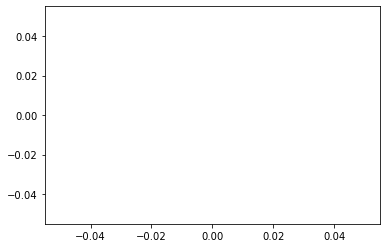

In [55]:
plt.plot(ntraj[ntraj["Bande"]=='elev'].index, ntraj[ntraj["Bande"]=='elev']["N2O gN.ha-1.j-1"])

Le pic à 174 est du à une erreur de virgule mal placée, il faut modifier ça

In [56]:
ntraj.replace(174.7421958024754, 17.47421958024754, inplace=True)

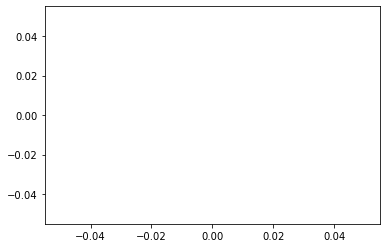

In [57]:
plt.plot(ntraj[ntraj["Bande"]=='elev'].index, ntraj[ntraj["Bande"]=='elev']["N2O gN.ha-1.j-1"])

In [58]:
print(ntraj.Bande.dtypes)

## On passe Bande en str pour faciliter le traitement

ntraj["Bande"] = ntraj["Bande"].astype("string")
print(ntraj.Bande.dtypes)

object
string


In [59]:
ntraj = ntraj.drop_duplicates()

In [60]:
ntraj = ntraj.dropna(thresh=6)

In [61]:
ntraj = preprocess(ntraj)

# agit seulement sur la colonne bande, mais cela permet d'avoir une équivalence

In [62]:
ntraj.Bande.unique()

array(['acs', 'bi', 'bio', 'elev', 'pn', 'ref', 'xxx'], dtype=object)

In [63]:
## On va mettre les bandes XXX, Toutes et Elev8 à part pour le moment 

ntraj_XXX = ntraj[ntraj.Bande.str.contains("xxx")]
ntraj_Toutes = ntraj[ntraj.Bande.str.contains("toutes")]
ntraj_Elev8 = ntraj[ntraj.Bande.str.contains("elev8")]

ntraj = ntraj[~ntraj.Bande.str.contains("xxx|toutes|elev8")]

In [64]:
ntraj.head()

,Bande,Date,%H - h1,%H - h2,NO3 Sol - h1\nkgN.ha-1,NO3 Sol - h2\nkgN.ha-1,NH4 Sol - h1\nkgN.ha-1,NH4 Sol - h2\nkgN.ha-1,N2O gN.ha-1.j-1
25,acs,2018-03-14,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290,18.537129
26,bi,2018-03-14,0.221340,0.222435,1.472030,2.484917,1.484297,1.906418,1.488817
28,bio,2018-03-14,0.212602,0.214897,1.594965,2.647370,1.933291,2.426755,1.390654
29,elev,2018-03-14,0.210646,0.202263,0.614166,1.104807,1.276502,1.688957,3.297613
31,pn,2018-03-14,0.214570,0.224213,0.727448,0.870433,1.612510,2.110141,2.088998


In [65]:
print("Nombre de valeurs de N2O enregistrées : " + str(sum(ntraj["N2O gN.ha-1.j-1"].isna() == False)))

Nombre de valeurs de N2O enregistrées : 375


### Tableau final

In [66]:
print(itk_concat["Date"][0])
print(itk_concat["Date"][0]-datetime.timedelta(days=7))
print(meteo[meteo.Date==itk_concat["Date"][0]-datetime.timedelta(days=7)]["Temp moyenne (°C)"])

2017-10-05 00:00:00
2017-09-28 00:00:00
13    17.4
Name: Temp moyenne (°C), dtype: float64


On veut un data frame avec pour chaque valeur de N20 enregistrée:
- la valeur en question
- valeur cumulée sur J-X 
- valeur de NO3 mesurée sur les 2 profondeurs H1 et H2
- valeur de NH4 mesurée sur les 2 profondeurs H1 et H2
- INN 
- humidité sur les 2 profondeurs H1 et H2
- température sur le jour du pic
- humidité de l'air sur le jour du pic
- pluie sur le jour du pic
- type de culture
- peuplement
- bande
- les valeurs météorologiques et techniques sur J-X 
    - valeur de NO3 mesurée sur les 2 profondeurs H1 et H2
    - valeur de NH4 mesurée sur les 2 profondeurs H1 et H2
    - INN
    - humidité sur les 2 profondeurs H1 et H2
    - température sur le jour 
    - humidité de l'air sur le jour
    - pluie sur le jour


In [67]:
ntraj_peak = ntraj[~ntraj["N2O gN.ha-1.j-1"].isna()]
ntraj_peak.shape

(375, 9)

In [68]:
ntraj_peak.head(10)

,Bande,Date,%H - h1,%H - h2,NO3 Sol - h1\nkgN.ha-1,NO3 Sol - h2\nkgN.ha-1,NH4 Sol - h1\nkgN.ha-1,NH4 Sol - h2\nkgN.ha-1,N2O gN.ha-1.j-1
25,acs,2018-03-14,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290,18.537129
26,bi,2018-03-14,0.221340,0.222435,1.472030,2.484917,1.484297,1.906418,1.488817
28,bio,2018-03-14,0.212602,0.214897,1.594965,2.647370,1.933291,2.426755,1.390654
29,elev,2018-03-14,0.210646,0.202263,0.614166,1.104807,1.276502,1.688957,3.297613
31,pn,2018-03-14,0.214570,0.224213,0.727448,0.870433,1.612510,2.110141,2.088998
33,ref,2018-03-14,0.216116,0.211143,0.765861,0.967024,1.726227,2.372433,2.568827
44,acs,2018-03-21,0.209520,0.202532,26.106278,12.204029,46.644215,7.438270,4.627536
46,bi,2018-03-21,0.206151,0.207587,3.692531,4.267449,2.617037,1.845383,0.844558
48,bio,2018-03-21,0.204598,0.213395,4.219050,4.815074,1.465941,2.058056,2.619045
50,elev,2018-03-21,0.201741,0.206339,20.565518,5.677773,48.780838,8.363207,2.194978


In [69]:
ntraj_peak.reset_index(drop=True, inplace=True)

In [70]:
ntraj_peak.head(6)

,Bande,Date,%H - h1,%H - h2,NO3 Sol - h1\nkgN.ha-1,NO3 Sol - h2\nkgN.ha-1,NH4 Sol - h1\nkgN.ha-1,NH4 Sol - h2\nkgN.ha-1,N2O gN.ha-1.j-1
0,acs,2018-03-14,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290,18.537129
1,bi,2018-03-14,0.221340,0.222435,1.472030,2.484917,1.484297,1.906418,1.488817
2,bio,2018-03-14,0.212602,0.214897,1.594965,2.647370,1.933291,2.426755,1.390654
3,elev,2018-03-14,0.210646,0.202263,0.614166,1.104807,1.276502,1.688957,3.297613
4,pn,2018-03-14,0.214570,0.224213,0.727448,0.870433,1.612510,2.110141,2.088998
5,ref,2018-03-14,0.216116,0.211143,0.765861,0.967024,1.726227,2.372433,2.568827


In [71]:
dataf = pd.DataFrame()

for idx,value in zip(ntraj_peak.index, ntraj_peak["N2O gN.ha-1.j-1"]):
    doi = ntraj_peak.at[idx, "Date"]
    bande = ntraj_peak.at[idx, "Bande"]

    data_n = dict()
    data_n["N20"] = value
    data_n["Date"] = doi
    data_n["Bande"] = bande

    # données ntraj
    ntraj_bande = ntraj[ntraj["Bande"] == bande]
    data_n["soilH_H1"] = ntraj_bande[ntraj_bande["Date"]==doi]["%H - h1"]
    data_n["soilH_H2"] = ntraj_bande[ntraj_bande["Date"]==doi]["%H - h2"]
    data_n["NO3_H1"] = ntraj_bande[ntraj_bande["Date"]==doi]["NO3 Sol - h1\nkgN.ha-1"]
    data_n["NO3_H2"] = ntraj_bande[ntraj_bande["Date"]==doi]["NO3 Sol - h2\nkgN.ha-1"]
    data_n["NH4_H1"] = ntraj_bande[ntraj_bande["Date"]==doi]["NH4 Sol - h1\nkgN.ha-1"]
    data_n["NH4_H2"] = ntraj_bande[ntraj_bande["Date"]==doi]["NH4 Sol - h2\nkgN.ha-1"]
    
    # données météo
    data_m = dict()
    data_m["meanTP"] = meteo[meteo["Date"]==doi]["Temp moyenne (°C)"]
    data_m["airH"] = meteo[meteo["Date"]==doi]["Humidité moyenne (%)"]
    data_m["pluie"] = meteo[meteo["Date"]==doi]["Pluie (mm)"]
    
    df_data_n = pd.DataFrame(data_n)
    df_data_m = pd.DataFrame(data_m)
    df_data = pd.concat([df_data_n.reset_index(drop=True), df_data_m.reset_index(drop=True)], axis=1)

    dfs = [dataf, df_data]
    dataf = pd.concat(dfs, axis=0, ignore_index=True) 

In [72]:
for idx,value in zip(ntraj_peak.head(6).index, ntraj_peak.head(6)["N2O gN.ha-1.j-1"]):
    doi = ntraj_peak.at[idx, "Date"]
    bande = ntraj_peak.at[idx, "Bande"]

    dataf.at[idx,"N20"] = value
    dataf.at[idx,"Date"] = doi
    dataf.at[idx,"Bande"] = bande

In [73]:
dataf

,N20,Date,Bande,soilH_H1,soilH_H2,NO3_H1,NO3_H2,NH4_H1,NH4_H2,meanTP,airH,pluie
0,18.537129,2018-03-14,acs,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290,8.8,73.0,7.5
1,1.488817,2018-03-14,bi,0.221340,0.222435,1.472030,2.484917,1.484297,1.906418,8.8,73.0,7.5
2,1.390654,2018-03-14,bio,0.212602,0.214897,1.594965,2.647370,1.933291,2.426755,8.8,73.0,7.5
3,3.297613,2018-03-14,elev,0.210646,0.202263,0.614166,1.104807,1.276502,1.688957,8.8,73.0,7.5
4,2.088998,2018-03-14,pn,0.214570,0.224213,0.727448,0.870433,1.612510,2.110141,8.8,73.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...
374,1.580530,2021-07-07,bi,0.159545,0.129038,6.695586,6.375657,0.704362,0.000000,17.6,66.0,0.0
375,2.237962,2021-07-07,bio,0.150744,0.127595,7.219916,6.966589,0.628884,0.000000,17.6,66.0,0.0
376,3.333095,2021-07-07,elev,0.157772,0.120262,6.841262,7.350346,0.000000,4.232270,17.6,66.0,0.0
377,1.371881,2021-07-07,pn,0.173188,0.138300,8.985163,6.369486,0.483164,0.000000,17.6,66.0,0.0


In [74]:
def previous_days(df, nb_jours):
    data = pd.DataFrame()
    for rows in df.index:
        date = df.at[rows, "Date"]
        bande = df.at[rows, "Bande"]
        ddata = pd.DataFrame()
        for days in range(1,nb_jours+1):
            doi = date - datetime.timedelta(days=days)

            # données ntraj
            data_n = dict()
            ntraj_bande = ntraj[ntraj["Bande"] == bande]
            data_n["soilH_H1_J{}".format(days)] = ntraj_bande[ntraj_bande["Date"]==doi]["%H - h1"]
            data_n["soilH_H2_J{}".format(days)] = ntraj_bande[ntraj_bande["Date"]==doi]["%H - h2"]
            data_n["NO3_H1_J{}".format(days)] = ntraj_bande[ntraj_bande["Date"]==doi]["NO3 Sol - h1\nkgN.ha-1"]
            data_n["NO3_H2_J{}".format(days)] = ntraj_bande[ntraj_bande["Date"]==doi]["NO3 Sol - h2\nkgN.ha-1"]
            data_n["NH4_H1_J{}".format(days)] = ntraj_bande[ntraj_bande["Date"]==doi]["NH4 Sol - h1\nkgN.ha-1"]
            data_n["NH4_H2_J{}".format(days)] = ntraj_bande[ntraj_bande["Date"]==doi]["NH4 Sol - h2\nkgN.ha-1"]
    
            # données météo
            data_m = dict()
            data_m["meanTP_J{}".format(days)] = meteo[meteo["Date"]==doi]["Temp moyenne (°C)"]
            data_m["airH_J{}".format(days)] = meteo[meteo["Date"]==doi]["Humidité moyenne (%)"]
            data_m["pluie_J{}".format(days)] = meteo[meteo["Date"]==doi]["Pluie (mm)"]
    
            df_data_n = pd.DataFrame(data_n)
            df_data_m = pd.DataFrame(data_m)
            df_data = pd.concat([df_data_n.reset_index(drop=True), df_data_m.reset_index(drop=True)], axis=1)
            ddata = pd.concat([ddata.reset_index(drop=True), df_data.reset_index(drop=True)], axis=1)
        data = pd.concat([data.reset_index(drop=True), ddata.reset_index(drop=True)], axis=0, ignore_index=True)
    return(data)

In [75]:
dataf[dataf["Bande"]=="acs"]

,N20,Date,Bande,soilH_H1,soilH_H2,NO3_H1,NO3_H2,NH4_H1,NH4_H2,meanTP,airH,pluie
0,18.537129,2018-03-14,acs,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290,8.8,73.0,7.5
6,4.627536,2018-03-21,acs,0.209520,0.202532,26.106278,12.204029,46.644215,7.438270,3.1,81.0,0.0
12,29.329117,2018-03-29,acs,0.225337,0.207528,73.099190,18.801835,72.983709,19.757861,6.3,85.0,3.5
18,30.584231,2018-04-05,acs,0.218094,0.206515,45.045180,17.019538,33.717362,8.907422,7.5,77.0,0.0
24,51.510280,2018-04-11,acs,0.224233,0.205574,46.833620,10.759040,70.000703,7.225628,12.0,73.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
349,4.142620,2021-04-13,acs,0.196316,0.185164,1.443469,5.556528,68.726233,4.415456,5.0,67.0,0.0
355,0.898610,2021-04-27,acs,0.116156,0.119102,10.816096,6.942603,1.772176,2.287499,11.3,48.0,0.0
361,1.661208,2021-05-11,acs,0.111800,0.102481,31.660839,9.984873,10.749152,0.840740,11.7,77.0,0.0
367,2.192739,2021-06-17,acs,0.104993,0.096978,18.568954,19.074375,1.250462,0.008592,21.3,82.0,13.0


In [76]:
days_before = 5

data = pd.concat([dataf.reset_index(drop=True), previous_days(dataf, days_before).reset_index(drop=True)], axis=1)

In [77]:
data[data["Bande"]=="acs"]

,N20,Date,Bande,soilH_H1,soilH_H2,NO3_H1,NO3_H2,NH4_H1,NH4_H2,meanTP,...,pluie_J4,soilH_H1_J5,soilH_H2_J5,NO3_H1_J5,NO3_H2_J5,NH4_H1_J5,NH4_H2_J5,meanTP_J5,airH_J5,pluie_J5
0,18.537129,2018-03-14,acs,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290,8.8,...,19.0,NaN,NaN,NaN,NaN,NaN,NaN,9.8,88.0,2.0
6,4.627536,2018-03-21,acs,0.209520,0.202532,26.106278,12.204029,46.644215,7.438270,3.1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.6,84.0,0.0
12,29.329117,2018-03-29,acs,0.225337,0.207528,73.099190,18.801835,72.983709,19.757861,6.3,...,0.5,NaN,NaN,NaN,NaN,NaN,NaN,8.4,80.0,0.0
18,30.584231,2018-04-05,acs,0.218094,0.206515,45.045180,17.019538,33.717362,8.907422,7.5,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.7,84.0,0.0
24,51.510280,2018-04-11,acs,0.224233,0.205574,46.833620,10.759040,70.000703,7.225628,12.0,...,0.5,NaN,NaN,NaN,NaN,NaN,NaN,11.2,70.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,4.142620,2021-04-13,acs,0.196316,0.185164,1.443469,5.556528,68.726233,4.415456,5.0,...,17.5,NaN,NaN,NaN,NaN,NaN,NaN,6.9,61.0,0.0
355,0.898610,2021-04-27,acs,0.116156,0.119102,10.816096,6.942603,1.772176,2.287499,11.3,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,10.1,59.0,0.0
361,1.661208,2021-05-11,acs,0.111800,0.102481,31.660839,9.984873,10.749152,0.840740,11.7,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.5,89.0,6.5
367,2.192739,2021-06-17,acs,0.104993,0.096978,18.568954,19.074375,1.250462,0.008592,21.3,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,17.5,82.0,0.0


In [78]:
def rolling_by(df_table : object, name_col : list, delta : int = 1, aggr : object =  lambda x: x.mean()) -> object:
    """
    Input :
        - df_table : input dataframe 
        - name_col : list of the columns that we are targetting
            ex : ['Temp moyenne (°C)', 'Pluie (mm)']
        - delta : Number of days for the rolling
        - aggr : Aggregation function (mean, sum ...) 
    Output :
        - Dataframe rolled over the delta day windows and aggregated by aggr.
    """
    # Get first column with the format datetime64
    try :
        date_col = df_table.select_dtypes(include="datetime64").columns[0]
    except IndexError :
        print("There is no datetime column")
        return IndexError

    name_col.insert(0,date_col)
    return (df_table[name_col].sort_index().rolling(window=delta, on=date_col).apply(aggr))

# Faudra juste faire attention à renommer les colonnes de l'output (on peut intégrer ça à la fonction)

In [79]:
rolled_N20 = rolling_by(data, ['N20'])
rolled_N20.drop("Date", inplace=True, axis=1)
rolled_N20.columns = ["rolled_N20"]

In [80]:
data = pd.concat([data,rolled_N20],axis=1)

In [81]:
data[data["Bande"]=="acs"]

,N20,Date,Bande,soilH_H1,soilH_H2,NO3_H1,NO3_H2,NH4_H1,NH4_H2,meanTP,...,soilH_H1_J5,soilH_H2_J5,NO3_H1_J5,NO3_H2_J5,NH4_H1_J5,NH4_H2_J5,meanTP_J5,airH_J5,pluie_J5,rolled_N20
0,18.537129,2018-03-14,acs,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290,8.8,...,NaN,NaN,NaN,NaN,NaN,NaN,9.8,88.0,2.0,18.537129
6,4.627536,2018-03-21,acs,0.209520,0.202532,26.106278,12.204029,46.644215,7.438270,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,8.6,84.0,0.0,4.627536
12,29.329117,2018-03-29,acs,0.225337,0.207528,73.099190,18.801835,72.983709,19.757861,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,8.4,80.0,0.0,29.329117
18,30.584231,2018-04-05,acs,0.218094,0.206515,45.045180,17.019538,33.717362,8.907422,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,6.7,84.0,0.0,30.584231
24,51.510280,2018-04-11,acs,0.224233,0.205574,46.833620,10.759040,70.000703,7.225628,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,11.2,70.0,0.0,51.510280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,4.142620,2021-04-13,acs,0.196316,0.185164,1.443469,5.556528,68.726233,4.415456,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.9,61.0,0.0,4.142620
355,0.898610,2021-04-27,acs,0.116156,0.119102,10.816096,6.942603,1.772176,2.287499,11.3,...,NaN,NaN,NaN,NaN,NaN,NaN,10.1,59.0,0.0,0.898610
361,1.661208,2021-05-11,acs,0.111800,0.102481,31.660839,9.984873,10.749152,0.840740,11.7,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,89.0,6.5,1.661208
367,2.192739,2021-06-17,acs,0.104993,0.096978,18.568954,19.074375,1.250462,0.008592,21.3,...,NaN,NaN,NaN,NaN,NaN,NaN,17.5,82.0,0.0,2.192739


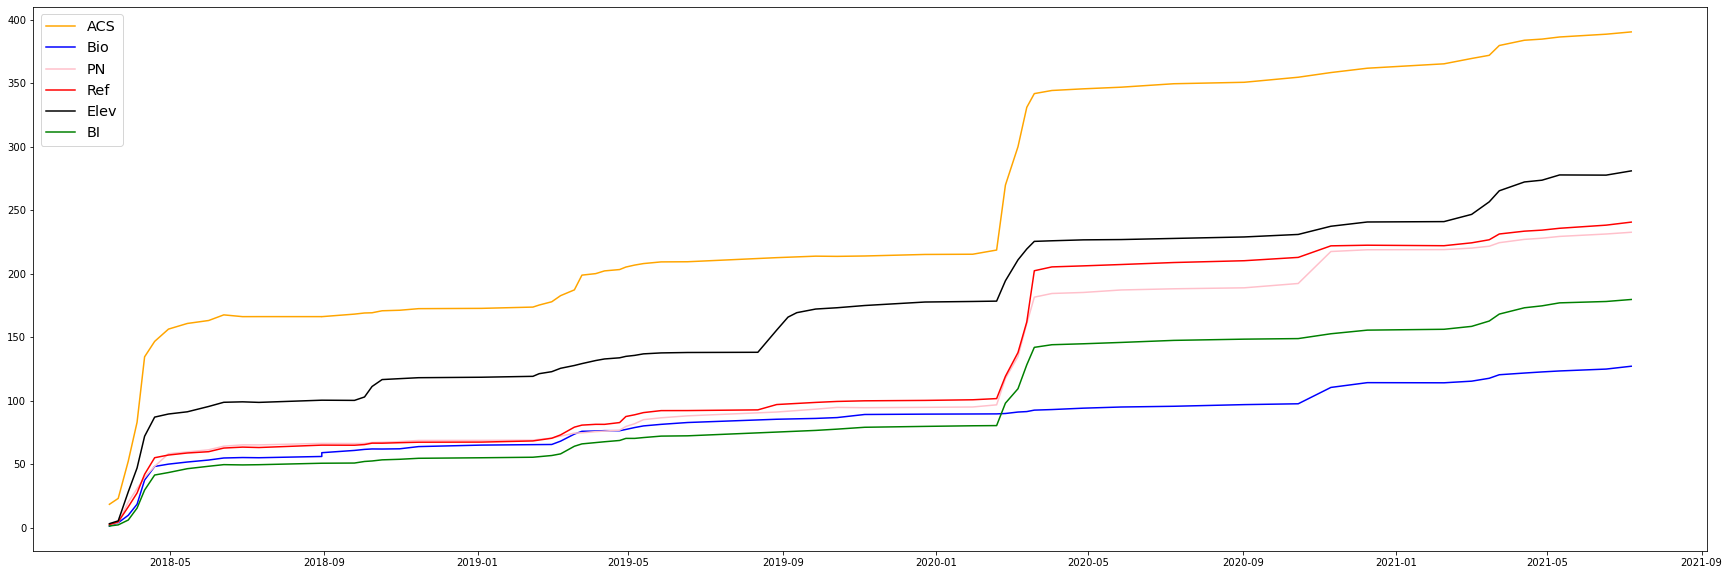

In [82]:
plt.figure(figsize=(30,10))
plt.plot(data[data["Bande"]=="acs"]["Date"], data[data["Bande"]=="acs"]["N20"].cumsum(), 'orange', label="ACS")
plt.plot(data[data["Bande"]=="bio"]["Date"], data[data["Bande"]=="bio"]["N20"].cumsum(), 'blue', label="Bio")
plt.plot(data[data["Bande"]=="pn"]["Date"], data[data["Bande"]=="pn"]["N20"].cumsum(), 'pink', label="PN")
plt.plot(data[data["Bande"]=="ref"]["Date"], data[data["Bande"]=="ref"]["N20"].cumsum(), 'red', label="Ref")
plt.plot(data[data["Bande"]=="elev"]["Date"], data[data["Bande"]=="elev"]["N20"].cumsum(), 'black', label="Elev")
plt.plot(data[data["Bande"]=="bi"]["Date"], data[data["Bande"]=="bi"]["N20"].cumsum(), 'green', label="BI")
plt.legend(loc="upper left", fontsize="x-large")

In [83]:
meteo.head()

,Date,Mois,Année,Temp moyenne (°C),Pluie (mm),Temp min,Temp max,ETP Penman (mm),Humidité moyenne (%),Humidité max (%),Humidité min (%)
0,2017-09-15,9,2017,11.2,0.0,7.6,16.5,2.3,84.0,99.0,56.0
1,2017-09-16,9,2017,10.7,1.0,4.8,15.6,1.6,86.0,100.0,57.0
2,2017-09-17,9,2017,11.3,3.0,9.4,15.7,1.5,89.0,100.0,66.0
3,2017-09-18,9,2017,10.5,9.0,4.4,17.1,1.6,91.0,100.0,70.0
4,2017-09-19,9,2017,11.7,2.0,9.2,16.8,1.7,88.0,99.0,60.0


In [84]:
data.to_csv("data_pretraite.csv", sep=";")

### Data For SVM One Class

In [85]:
data_svm = data.copy()
data_svm.dropna(axis=1, inplace=True) # Je sais pas trop quoi en faire après ...
# data_svm.head()
data_svm = data_svm.drop(data_svm.columns[[-1]], axis=1) # C'est quoi l'intérêt de la dernière colonne ?
data_svm = data_svm[data_svm.columns[0:9]]
data_svm.NH4_H2[data_svm.NH4_H2 == data_svm.NH4_H2.max()] =  data_svm.NH4_H2.max() / 100 # Valeur abérrante (semble juste être une virgule décalée )
data_svm.head()


,N20,Date,Bande,soilH_H1,soilH_H2,NO3_H1,NO3_H2,NH4_H1,NH4_H2
0,18.537129,2018-03-14,acs,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290
1,1.488817,2018-03-14,bi,0.221340,0.222435,1.472030,2.484917,1.484297,1.906418
2,1.390654,2018-03-14,bio,0.212602,0.214897,1.594965,2.647370,1.933291,2.426755
3,3.297613,2018-03-14,elev,0.210646,0.202263,0.614166,1.104807,1.276502,1.688957
4,2.088998,2018-03-14,pn,0.214570,0.224213,0.727448,0.870433,1.612510,2.110141


### Météo

In [86]:
# J_list = [3,7,21,30]
J_list = [1,7,30]

# Temp moyenne & Humidité moyenne (%)
for i, j in enumerate(J_list) :
    data_svm = pd.merge(data_svm, rolling_by(meteo, ['Temp moyenne (°C)', 'Humidité moyenne (%)'], j, lambda x: x.mean()), on='Date')
    data_svm.rename(columns={data_svm.columns[-2]: "Temp moyenne (°C) J" + str(j)}, inplace=True)
    data_svm.rename(columns={data_svm.columns[-1]: "Humidité moyenne (%) J" + str(j)}, inplace=True)

#Pluie (mm) & ETP Penman (mm)
for i, j in enumerate(J_list) :
    data_svm = pd.merge(data_svm, rolling_by(meteo, ['Pluie (mm)', 'ETP Penman (mm)'], j, lambda x: x.sum()), on='Date')
    data_svm.rename(columns={data_svm.columns[-2]: "Sum Pluie (mm) J" + str(j)}, inplace=True)
    data_svm.rename(columns={data_svm.columns[-1]: "Sum ETP Penman (mm) J" + str(j)}, inplace=True)

#Humidité max (%) & Temp max
for i, j in enumerate(J_list) :
    data_svm = pd.merge(data_svm, rolling_by(meteo, ['Humidité max (%)'], j, lambda x: x.mean()), on='Date')
    data_svm.rename(columns={data_svm.columns[-2]: "Humidité max (%) J" + str(j)}, inplace=True)
    # data_svm.rename(columns={data_svm.columns[-1]: "Temp max J" + str(j)}, inplace=True)

#Humidité min (%) & Temp min
for i, j in enumerate(J_list) :
    data_svm = pd.merge(data_svm, rolling_by(meteo, ['Humidité min (%)', 'Temp min'], j, lambda x: x.mean()), on='Date')
    data_svm.rename(columns={data_svm.columns[-2]: "Sum Humidité min (%) J" + str(j)}, inplace=True)
    data_svm.rename(columns={data_svm.columns[-1]: "Temp min J" + str(j)}, inplace=True)

# data_svm.describe()

In [87]:
# print(data_svm.columns[[20]])
data_svm = data_svm.drop(data_svm.columns[[20]], axis=1) #  présence NA
# print(data_svm.isna().sum())

In [88]:
print(data_svm.head())

         N20       Date Bande  soilH_H1  soilH_H2     NO3_H1     NO3_H2  \
0  18.537129 2018-03-14   acs  0.214182  0.197413  18.727429  11.471587   
1   1.488817 2018-03-14    bi  0.221340  0.222435   1.472030   2.484917   
2   1.390654 2018-03-14   bio  0.212602  0.214897   1.594965   2.647370   
3   3.297613 2018-03-14  elev  0.210646  0.202263   0.614166   1.104807   
4   2.088998 2018-03-14    pn  0.214570  0.224213   0.727448   0.870433   

      NH4_H1    NH4_H2  Temp moyenne (°C) J1  ...  Sum Pluie (mm) J30  \
0  62.840091  8.822290                  73.0  ...                29.7   
1   1.484297  1.906418                  73.0  ...                29.7   
2   1.933291  2.426755                  73.0  ...                29.7   
3   1.276502  1.688957                  73.0  ...                29.7   
4   1.612510  2.110141                  73.0  ...                29.7   

   Humidité max (%) J7  Humidité max (%) J30  Humidité max (%)  \
0                100.0             98.428571

### Bandes

In [89]:
from sklearn.preprocessing import OneHotEncoder

Bande = data_svm.Bande
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(Bande.values.reshape(-1, 1))
encodage_df = pd.DataFrame(encoded_data, columns=Bande.unique())
data_svm = pd.concat([data_svm, encodage_df], axis=1)
# data_svm = data_svm.drop(data_svm.columns[[2]], axis=1) # Drop la colonne bande qui ne sert plus
data_svm.head()

,N20,Date,Bande,soilH_H1,soilH_H2,NO3_H1,NO3_H2,NH4_H1,NH4_H2,Temp moyenne (°C) J1,...,Sum Humidité min (%) J7,Temp min J7,Sum Humidité min (%) J30,Temp min J30,acs,bi,bio,elev,pn,ref
0,18.537129,2018-03-14,acs,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290,73.0,...,67.857143,6.657143,67.433333,0.973333,1.0,0.0,0.0,0.0,0.0,0.0
1,1.488817,2018-03-14,bi,0.221340,0.222435,1.472030,2.484917,1.484297,1.906418,73.0,...,67.857143,6.657143,67.433333,0.973333,0.0,1.0,0.0,0.0,0.0,0.0
2,1.390654,2018-03-14,bio,0.212602,0.214897,1.594965,2.647370,1.933291,2.426755,73.0,...,67.857143,6.657143,67.433333,0.973333,0.0,0.0,1.0,0.0,0.0,0.0
3,3.297613,2018-03-14,elev,0.210646,0.202263,0.614166,1.104807,1.276502,1.688957,73.0,...,67.857143,6.657143,67.433333,0.973333,0.0,0.0,0.0,1.0,0.0,0.0
4,2.088998,2018-03-14,pn,0.214570,0.224213,0.727448,0.870433,1.612510,2.110141,73.0,...,67.857143,6.657143,67.433333,0.973333,0.0,0.0,0.0,0.0,1.0,0.0


### Date

In [90]:
data_svm['week'] = data_svm['Date'].dt.isocalendar().week
data_svm['month'] = data_svm['Date'].dt.month
data_svm['year'] = data_svm['Date'].dt.year


year = data_svm.year
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(year.values.reshape(-1, 1))
encodage_df = pd.DataFrame(encoded_data, columns=year.unique())
data_svm = pd.concat([data_svm, encodage_df], axis=1)
# data_svm = data_svm.drop(data_svm.columns[[1]], axis=1) # Drop la colonne Date qui ne sert plus
data_svm.head()

,N20,Date,Bande,soilH_H1,soilH_H2,NO3_H1,NO3_H2,NH4_H1,NH4_H2,Temp moyenne (°C) J1,...,elev,pn,ref,week,month,year,2018,2019,2020,2021
0,18.537129,2018-03-14,acs,0.214182,0.197413,18.727429,11.471587,62.840091,8.822290,73.0,...,0.0,0.0,0.0,11,3,2018,1.0,0.0,0.0,0.0
1,1.488817,2018-03-14,bi,0.221340,0.222435,1.472030,2.484917,1.484297,1.906418,73.0,...,0.0,0.0,0.0,11,3,2018,1.0,0.0,0.0,0.0
2,1.390654,2018-03-14,bio,0.212602,0.214897,1.594965,2.647370,1.933291,2.426755,73.0,...,0.0,0.0,0.0,11,3,2018,1.0,0.0,0.0,0.0
3,3.297613,2018-03-14,elev,0.210646,0.202263,0.614166,1.104807,1.276502,1.688957,73.0,...,1.0,0.0,0.0,11,3,2018,1.0,0.0,0.0,0.0
4,2.088998,2018-03-14,pn,0.214570,0.224213,0.727448,0.870433,1.612510,2.110141,73.0,...,0.0,1.0,0.0,11,3,2018,1.0,0.0,0.0,0.0


In [91]:
data_svm.to_csv("./Output/data_pretraite_svm.csv", sep=";")